# Running NEMO in a jupyter notebook

This notebook will help you getting started with [NEMO](https://teuben.github.io/nemo/) in a jupyter notebook!

NEMO is a package that consists of [a set of 
compiled executables](https://teuben.github.io/nemo/man_html/index1.html) that run in a Unix environment. Normally you would issue commands in a terminal (shell), or via a script. Parameters are passed to the programs, and data are stored in files or passed via unix pipes.
But since NEMO version 4.1.2 there is some better support to use NEMO commands in a jupyter notebook.    There are a few ways to use these into a notebook, with currently a few limitations. Here we are exploring some, but watch out for future changes. For now we are also limited to Python.

When NEMO was installed, the file **nemo_start.py** was also created. This file will need to be locally present, so we can import it, or copied into your python's sys.path, or your site-packages. This is the best way to make sure to inherit the environment in a portable way.

Here is our currently suggested way to set up your python shell for NEMO, one simple **import**:

In [1]:
import nemo_start

Loading NEMO=/home/teuben/NEMO/nemo  VERSION 4.1.7


Then we add a few common imports, for plotting in this case.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

There are several ways to run NEMO commands. We take an example of creating a plummer sphere with 10 particles and a known seed so we always know the answer. We then look at the phase space coordinated of these 10 bodies. We need two programs:  **mkplummer** and **snapprint**   (for the old timers:   **snapplot** does not work in notebooks since it creates a PNG, PS or X-display)

So, first lets look at the keywords that these programs have:

In [3]:
!mkplummer help=h

out              : Output file name [???]
nbody            : Number of particles [???]
mlow             : Low mass fraction cutoff of Plummer dist [0]
mfrac            : Mass fraction used of Plummer distribution [0.999]
rfrac            : Radius fraction used of Plummer distribution
                              NOTE: the above two values are chosen so
                                    that m( rfrac ) = mfrac                 [22.8042468]
seed             : Seed for the random number generator [0]
time             : Time at which snapshot is taken [0.0]
zerocm           : Centrate snapshot (t/f)? [t]
scale            : Model scale factor (-1=virial 1=natural) [-1]
quiet            : 0=noisy 1=somewhat quiet 2=more quiet [0]
massname         : If used Mass-function name (e.g. n(m)) []
massexpr         : Mass function expression (e.g. pow(m,p)) [pow(m,p)]
masspars         : Mass function parameters (e.g. p,0.0) [p,0.0]
massrange        : Range for mass-spectrum (e.g. 1,2) [1,1]
headlin

In [4]:
!snapprint help=h

in               : Input file (snapshot) [???]
options          : Things to output [x,y,z,vx,vy,vz]
format           : Format used to output numbers [%g]
separ            : Special table of interparticle distances [0]
times            : Times to select snapshot [all]
tab              : Standard output or table file? []
header           : Add header (nbody,time)to output? [f]
newline          : add newline in the header? [f]
csv              : Use Comma Separated Values format [f]
comment          : Add table columns as common, instead of debug [f]
VERSION          : 24-feb-04 PJT [2.4]


In [5]:
!man mkplummer

MKPLUMMER(1NEMO)                                              MKPLUMMER(1NEMO)

NNAAMMEE
       mkplummer - generates a snapshot according to a truncated Plummer model

SSYYNNOOPPSSIISS
       mmkkpplluummmmeerr [parameters=values...]

DDEESSCCRRIIPPTTIIOONN
       _m_k_p_l_u_m_m_e_r  constructs  a Plummer model, with a spatial or mass cut-off,
       after which it performs a coordinate transformation to  the  center-of-
       mass  coordinate  system.  The  data are then written into a file _s_n_a_p_-
       _f_i_l_e, in a standard N-body snapshot format.  The model  is  constructed
       in  VIRIAL  units (M=G=-4E=1, with E the total energy), and finite spa‐
       tial extent which can be regulated by  specifying  _m_f_r_a_c  or  _r_f_r_a_c  or
       using  their  default  values.   The distribution function of a Plummer
       model is spherically symmetric and isotropic, and  is  a  polytrope  of
       index n = 5.  

So, we have used the  **!** escape character to escape from python and issue a shell command directly.   Now we will use a pipe to take the output of mkplummer and pipe it into snapprint, which redirects the output table into a file, which we'll read with numpy a little later:

In [6]:
!mkplummer - 10 seed=123| snapprint - > p10.tab
(x,y,z,vx,vy,vz) = np.loadtxt('p10.tab').T
tab = np.loadtxt('p10.tab')
print(tab.shape)
print(tab)


### nemo Debug Info: x y z vx vy vz 
(10, 6)
[[-0.609486  -0.221687  -0.450963  -0.0766784 -0.209397   0.396561 ]
 [ 4.80925   -0.486182  -1.52575    0.418474   0.117766   0.230193 ]
 [ 0.545314   0.0795464  0.0632245  0.0867019 -0.109128  -0.282036 ]
 [ 0.377209  -0.213318  -0.011833  -0.739982   0.649302  -0.0595349]
 [-0.0724005  0.706104   0.0899005  0.158021   0.0702185  0.316083 ]
 [-0.561212  -0.32416    1.18761    0.379356   0.257397   0.0247723]
 [-0.312291  -0.902718  -0.451821   0.669557  -0.463708  -0.117066 ]
 [ 0.36967    0.154617   0.681866  -0.0283658 -0.0937881 -0.135925 ]
 [ 0.106249   0.255479  -0.0102538 -0.757828   0.0154417 -0.328447 ]
 [-4.6523     0.95232    0.428016  -0.109256  -0.234103  -0.0446015]]


So you see the **help=h** keyword gives you some help, though there are also online manpages with far more background information. See for example 
https://teuben.github.io/nemo/man_html/mkplummer.1.html for  the **mkplummer** program.


Apart from that NEMO programs use **keyword=value**, instead of **--keyword value** to pass parameters into the program, there is another feature about files in NEMO.   The stdin on one end of the pipe can be connected to the stdout of the other side of the pipe.

The example here could have equally well have been run with

        mkplummer p10 10 seed=123
        snapprint p10 > p10.tab
        
Now that we have the phase space coordinates in (x,y,z,vx,vy,vz), we can make some interesting plots:

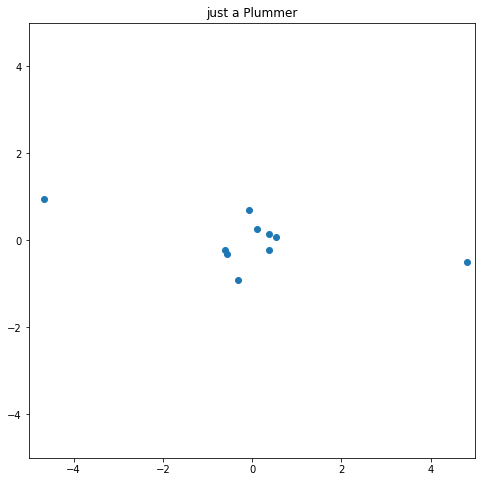

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title("just a Plummer");

One can also open a **bash** shell in a cell, but remember each cell is essentially a new shell.

In [8]:
%%bash
mkplummer - 10  seed=123 | snapprint -

-0.609486 -0.221687 -0.450963 -0.0766784 -0.209397 0.396561 
4.80925 -0.486182 -1.52575 0.418474 0.117766 0.230193 
0.545314 0.0795464 0.0632245 0.0867019 -0.109128 -0.282036 
0.377209 -0.213318 -0.011833 -0.739982 0.649302 -0.0595349 
-0.0724005 0.706104 0.0899005 0.158021 0.0702185 0.316083 
-0.561212 -0.32416 1.18761 0.379356 0.257397 0.0247723 
-0.312291 -0.902718 -0.451821 0.669557 -0.463708 -0.117066 
0.36967 0.154617 0.681866 -0.0283658 -0.0937881 -0.135925 
0.106249 0.255479 -0.0102538 -0.757828 0.0154417 -0.328447 
-4.6523 0.95232 0.428016 -0.109256 -0.234103 -0.0446015 


### nemo Debug Info: x y z vx vy vz 


One can also define python variables, and pass them into one of the two common ways to pass on

In [9]:
nbody=10
seed=123

In [10]:
!mkplummer - {nbody} seed={seed} | snapprint -

### nemo Debug Info: x y z vx vy vz 
-0.609486 -0.221687 -0.450963 -0.0766784 -0.209397 0.396561 
4.80925 -0.486182 -1.52575 0.418474 0.117766 0.230193 
0.545314 0.0795464 0.0632245 0.0867019 -0.109128 -0.282036 
0.377209 -0.213318 -0.011833 -0.739982 0.649302 -0.0595349 
-0.0724005 0.706104 0.0899005 0.158021 0.0702185 0.316083 
-0.561212 -0.32416 1.18761 0.379356 0.257397 0.0247723 
-0.312291 -0.902718 -0.451821 0.669557 -0.463708 -0.117066 
0.36967 0.154617 0.681866 -0.0283658 -0.0937881 -0.135925 
0.106249 0.255479 -0.0102538 -0.757828 0.0154417 -0.328447 
-4.6523 0.95232 0.428016 -0.109256 -0.234103 -0.0446015 


In [11]:
%%bash -s $nbody $seed

mkplummer - $1  seed=$2 | snapprint -

-0.609486 -0.221687 -0.450963 -0.0766784 -0.209397 0.396561 
4.80925 -0.486182 -1.52575 0.418474 0.117766 0.230193 
0.545314 0.0795464 0.0632245 0.0867019 -0.109128 -0.282036 
0.377209 -0.213318 -0.011833 -0.739982 0.649302 -0.0595349 
-0.0724005 0.706104 0.0899005 0.158021 0.0702185 0.316083 
-0.561212 -0.32416 1.18761 0.379356 0.257397 0.0247723 
-0.312291 -0.902718 -0.451821 0.669557 -0.463708 -0.117066 
0.36967 0.154617 0.681866 -0.0283658 -0.0937881 -0.135925 
0.106249 0.255479 -0.0102538 -0.757828 0.0154417 -0.328447 
-4.6523 0.95232 0.428016 -0.109256 -0.234103 -0.0446015 


### nemo Debug Info: x y z vx vy vz 


here is yet another way, but the stdout/stderr will go to the original terminal from which jupyter was started. You may never see this, if you never saw this terminal (think remote users like on SciServer), so this method is probably to be avoided

In [12]:
cmd = 'mkplummer - 10 seed=123 | snapprint -'
os.system(cmd)

0

In [13]:
cmd = 'mkplummer - 10 seed=123 | snapprint - > p10.log'
os.system(cmd)
!cat p10.log

-0.609486 -0.221687 -0.450963 -0.0766784 -0.209397 0.396561 
4.80925 -0.486182 -1.52575 0.418474 0.117766 0.230193 
0.545314 0.0795464 0.0632245 0.0867019 -0.109128 -0.282036 
0.377209 -0.213318 -0.011833 -0.739982 0.649302 -0.0595349 
-0.0724005 0.706104 0.0899005 0.158021 0.0702185 0.316083 
-0.561212 -0.32416 1.18761 0.379356 0.257397 0.0247723 
-0.312291 -0.902718 -0.451821 0.669557 -0.463708 -0.117066 
0.36967 0.154617 0.681866 -0.0283658 -0.0937881 -0.135925 
0.106249 0.255479 -0.0102538 -0.757828 0.0154417 -0.328447 
-4.6523 0.95232 0.428016 -0.109256 -0.234103 -0.0446015 
